In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm

In [47]:
data = hddm.load_csv('HCP_wm_behavioral_data.csv')
data = data.rename(columns={'RT':'rt','accuracy':'response','subject':'subj_idx'})
data.rt = data.rt/1000
#data = data[data['response'] == 1] #Removing Error Trials
data = data[data['session'] == 'RL'] #keeping only RL trials
data = data[data['rt'] != 0] #Removing no-response trials

In [48]:
print data[data['task'] == '0bk'].rt.mean()
print data[data['task'] == '2bk'].rt.mean()

0.866592288173
1.06704143536


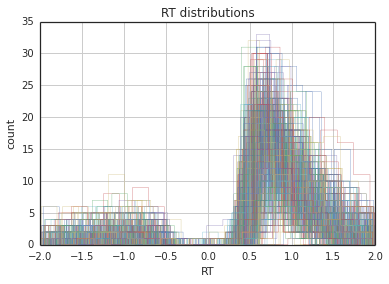

In [49]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

In [52]:
m_stim = hddm.HDDM(data, depends_on={'v': 'task',
                                    't': 'task',
                                    'a': 'task'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000,dbname='traces.db',db='pickle')
m_stim.save('hcp_wm_RL')

 [-----------------100%-----------------] 10001 of 10000 complete in 11397.0 sec

Plotting a(0bk)
Plotting a(2bk)
Plotting v(0bk)
Plotting v(2bk)
Plotting t(0bk)
Plotting t(2bk)


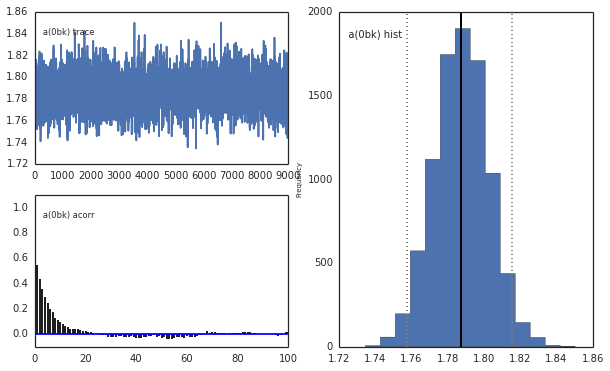

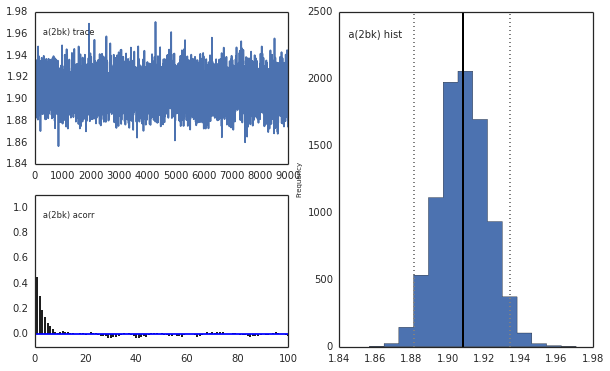

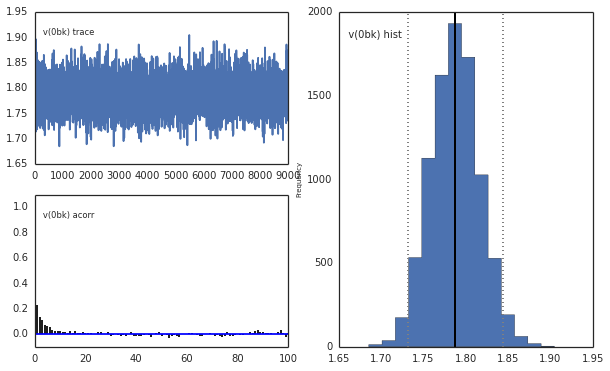

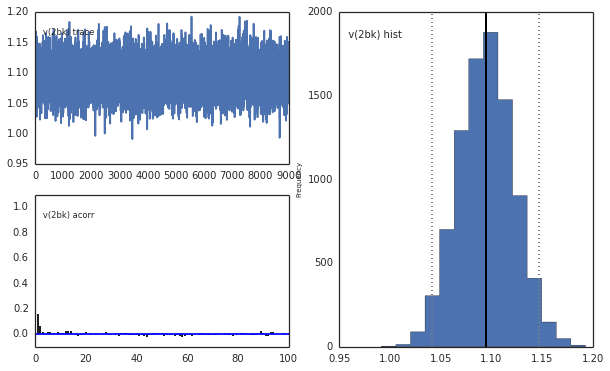

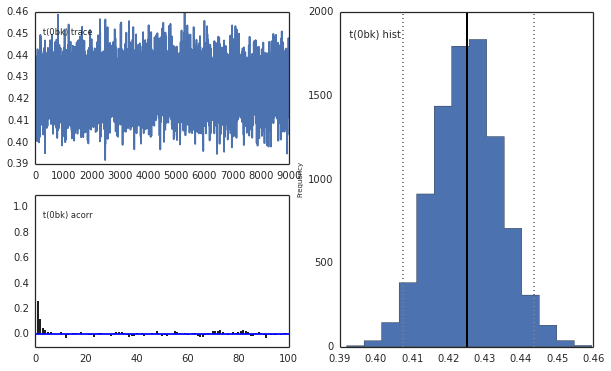

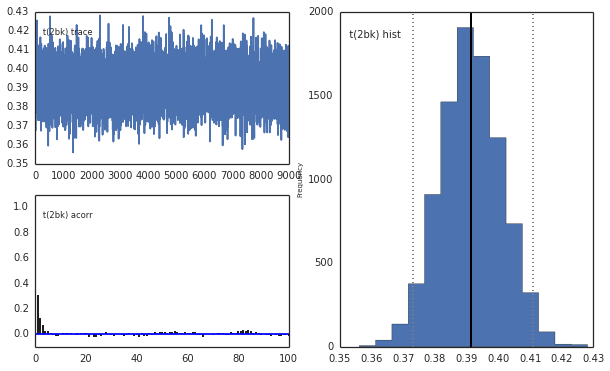

In [53]:
m_stim.plot_posteriors(['a','t','v'])

In [54]:
stats = m_stim.gen_stats()
stats.to_csv('hcp_wm_HDDM_2bk_0bk_model_RL.csv')
stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(0bk),1.78746,0.0149246,1.75841,1.77735,1.78721,1.79765,1.81676,0.000380358
a(2bk),1.90854,0.0135759,1.88223,1.89936,1.90832,1.91744,1.93556,0.000245994
a_std,0.221746,0.00977079,0.203426,0.214969,0.221524,0.228155,0.241836,0.000287984
a_subj(0bk).100307,1.67635,0.141453,1.41892,1.57539,1.67009,1.76907,1.97047,0.00243279
a_subj(2bk).100307,1.76092,0.133279,1.51945,1.66672,1.75461,1.84786,2.03875,0.00183906
a_subj(0bk).100408,2.03915,0.175284,1.72405,1.91572,2.03115,2.15054,2.41446,0.00316063
a_subj(2bk).100408,2.09131,0.156976,1.804,1.98339,2.08477,2.19309,2.42157,0.00214352
a_subj(0bk).101006,1.92599,0.155189,1.63942,1.81959,1.91964,2.0283,2.24912,0.00237923
a_subj(2bk).101006,1.48958,0.111717,1.28848,1.4119,1.48359,1.56137,1.72492,0.00181922
a_subj(0bk).101107,1.7295,0.149801,1.45758,1.62531,1.72159,1.8235,2.05104,0.00271099


P(0bk > 2bk) =  1.0


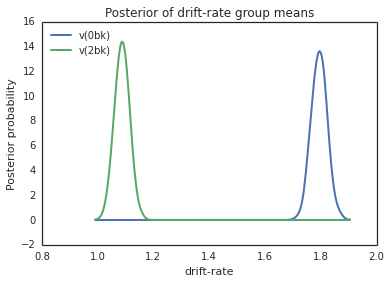

In [55]:
# Condition drift-rate posteriors
v_0, v_2 = m_stim.nodes_db.node[['v(0bk)','v(2bk)']]
hddm.analyze.plot_posterior_nodes([v_0, v_2])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(0bk > 2bk) = ", (v_0.trace() > v_2.trace()).mean()

P(2bk > 0bk) =  1.0


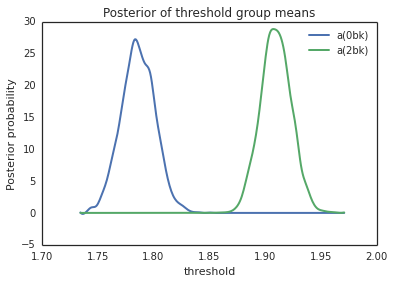

In [56]:
# Condition threshold posteriors
a_0, a_2 = m_stim.nodes_db.node[['a(0bk)','a(2bk)']]
hddm.analyze.plot_posterior_nodes([a_0, a_2])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

print "P(2bk > 0bk) = ", (a_2.trace() > a_0.trace()).mean()

P(0bk > 2bk) =  0.997333333333


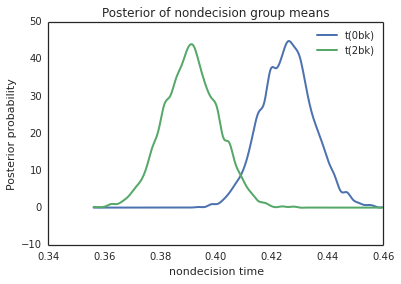

In [57]:
# Condition nondecision posteriors
t_0, t_2 = m_stim.nodes_db.node[['t(0bk)','t(2bk)']]
hddm.analyze.plot_posterior_nodes([t_0, t_2])
plt.xlabel('nondecision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of nondecision group means')

print "P(0bk > 2bk) = ", (t_0.trace() > t_2.trace()).mean()